# Notebook 2: Data Cleaning and EDA


In this notebook I will clean my dataset and examine some trends in my data. I will remove all unnecessary characters from my title column, look at the distribution of word counts per post, character counts per post, and examine the most frequently used words in each class to determine what I should or shouldn't add to my stopwords list. I will be instantiating a countvectorizer to do this. I am hoping that by finding a list of common words and a list of unique words in the two classes that I can find trends in what kinds of words people use when displaying toxic and unhealthy behavior online that should be noted by social media sites for further examination.

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('fivethirtyeight')

Reading the CSV with my combined dataframes from notebook 1. 

In [148]:
df = pd.read_csv('../data/combined_df.csv')

Examining the top rows. r/unethicallifeprotips is my target class, 1. 

In [149]:
df.head()

,author,title,subreddit,permalink
0,minigunman123,"If you load a news website with a paywall, kee...",0,/r/LifeProTips/comments/b7wnp4/if_you_load_a_n...
1,Justinjp126,So you know those little pieces of detached sk...,0,/r/LifeProTips/comments/b7wnm4/lpt_so_you_know...
2,TheFormulaS,Use a pistachio shell to help you open a pista...,0,/r/LifeProTips/comments/b7wnja/lpt_use_a_pista...
3,NullandRandom,Whenever you buy food combos but you know that...,0,/r/LifeProTips/comments/b7wney/lpt_whenever_yo...
4,Serenitybyjan88,Take a picture or video of yourself doing the ...,0,/r/LifeProTips/comments/b7wncl/lpt_take_a_pict...


In [150]:
df.shape

(19742, 4)

Examining a couple posts to see what's going on in my dataset. 

In [151]:
df.loc[4]['title']

'Take a picture or video of yourself doing the things you’ll later worry you forgot to do'

Looking at the above title, we can see that this post is wholesome and sincere, and likely part of the 0 class.

In [152]:
df.loc[4,'title']

'Take a picture or video of yourself doing the things you’ll later worry you forgot to do'

Similar to above, this post is sincere and isn't offering any harmful suggestions or tips.

In [153]:
df.loc[12000,'title']

'Want a few days off? If your employer offers bereavement. Look through the obituary find the date(s) you want. Tell you boss that your aunt or uncle passed away. If you decide to attend the funeral to get the program you may also get a free meal out of it.'

On the contrary to above, this post offers suggestions on how to sneak around the rules and act unethically to gain an immoral advantage over peers by lying about a serious issue, a death in the family. This is part of my target class. A post like this on social media should be noted. If someone is unaware enough to post this on social media, they shouldn't be considered for the job they have.

Looking at datatypes to see what I'm working with. 

In [154]:
df.dtypes

author       object
title        object
subreddit     int64
permalink    object
dtype: object

Lowercasing everything in the title column, as this will be the only data I'm really working with. 

In [155]:
df['title'] = df['title'].str.lower()

Checking for null values. 

In [156]:
df['title'].isnull().sum()

6

There are few enough null values that I will just delete them. 

In [157]:
df.dropna(axis = 0, inplace = True)

In [158]:
df.title.isnull().sum()

0

In [159]:
df.isnull().sum()

author       0
title        0
subreddit    0
permalink    0
dtype: int64

In [160]:
df.shape

(19736, 4)

Checking class distributions. 

In [161]:
df.subreddit.value_counts(normalize=True)

1    0.501925
0    0.498075
Name: subreddit, dtype: float64

My classes are just about even. 50.2% to the target class.

Reseting the index. 

In [162]:
df.index = range(len(df['title']))

In [163]:
df[['title']].head()

,title
0,"if you load a news website with a paywall, kee..."
1,so you know those little pieces of detached sk...
2,use a pistachio shell to help you open a pista...
3,whenever you buy food combos but you know that...
4,take a picture or video of yourself doing the ...


Using regex to get rid of everything except lowercase and uppercase letters. Uppercase letters should have been lowercased already, but just making sure. 

In [164]:
df['title'] = df['title'].apply(lambda x: re.sub('([^a-zA-Z ]|aaa)', '', x))

Checking if there are any empty title rows. 

In [165]:
df[df['title'] == '']

,author,title,subreddit,permalink
4315,polkmjh,,0,/r/LifeProTips/comments/azpe2g/ดบอล/
6201,polkmjh,,0,/r/LifeProTips/comments/aw39l8/먹튀/
6846,14681452,,0,/r/LifeProTips/comments/aurhb8/102934729293900...
7796,jaelstrauss33,,0,/r/LifeProTips/comments/at1ko9/แทงบอล/
10596,talpa710,,1,/r/UnethicalLifeProTips/comments/b38wlo/ulpt_6...
12283,nicbrit93,,1,/r/UnethicalLifeProTips/comments/au9g24/ulpt/
16572,Lx13lx,,1,/r/UnethicalLifeProTips/comments/aab42b/ulpt/
18839,xxxmlgglmxxx,,1,/r/UnethicalLifeProTips/comments/a2ieej/ulpt/


Dropping all empty title values. 

In [166]:
df = df[df['title'] != '']

In [167]:
df[df['title'] == '']

,author,title,subreddit,permalink


Resetting index after dropping row.

In [168]:
df.index = range(len(df['title']))

In [169]:
len(df.title)

19728

Shuffling my dataset so that the target class and the 0 class aren't sorted. 

In [170]:
df = df.sample(len(df.title), replace=False)

In [171]:
df.head()

,author,title,subreddit,permalink
3686,jamyang09,seful everything with kuntu zangpo,0,/r/LifeProTips/comments/b0wubm/useful_everythi...
4578,Baconlover1984,add a pinch of salt if your coffee is too bitter,0,/r/LifeProTips/comments/azbcs0/add_a_pinch_of_...
18432,Loveforthestacks,before committing a crime start playing the gu...,1,/r/UnethicalLifeProTips/comments/a3y9c7/before...
320,burieddeepbetween,instead of drying your saucepan frying pan wi...,0,/r/LifeProTips/comments/b7a107/lpt_instead_of_...
3422,ProfessionalCatWolf,when waking up from a dream youre about to go ...,0,/r/LifeProTips/comments/b1fwgg/lpt_when_waking...


In [172]:
df.shape

(19728, 4)

Adding a 'title_length' column that counts the characters in the title column.

In [173]:
df['title_length'] = df['title'].apply(len)

Adding a 'word_count' column that counts the words in the title column.

In [174]:
df['word_count'] = df['title'].map(lambda x: len(x.split()))

In [175]:
df.head()

,author,title,subreddit,permalink,title_length,word_count
3686,jamyang09,seful everything with kuntu zangpo,0,/r/LifeProTips/comments/b0wubm/useful_everythi...,34,5
4578,Baconlover1984,add a pinch of salt if your coffee is too bitter,0,/r/LifeProTips/comments/azbcs0/add_a_pinch_of_...,48,11
18432,Loveforthestacks,before committing a crime start playing the gu...,1,/r/UnethicalLifeProTips/comments/a3y9c7/before...,120,19
320,burieddeepbetween,instead of drying your saucepan frying pan wi...,0,/r/LifeProTips/comments/b7a107/lpt_instead_of_...,169,32
3422,ProfessionalCatWolf,when waking up from a dream youre about to go ...,0,/r/LifeProTips/comments/b1fwgg/lpt_when_waking...,108,24


Plotting the character count by class and comparing the distribution to the mean of each class. 

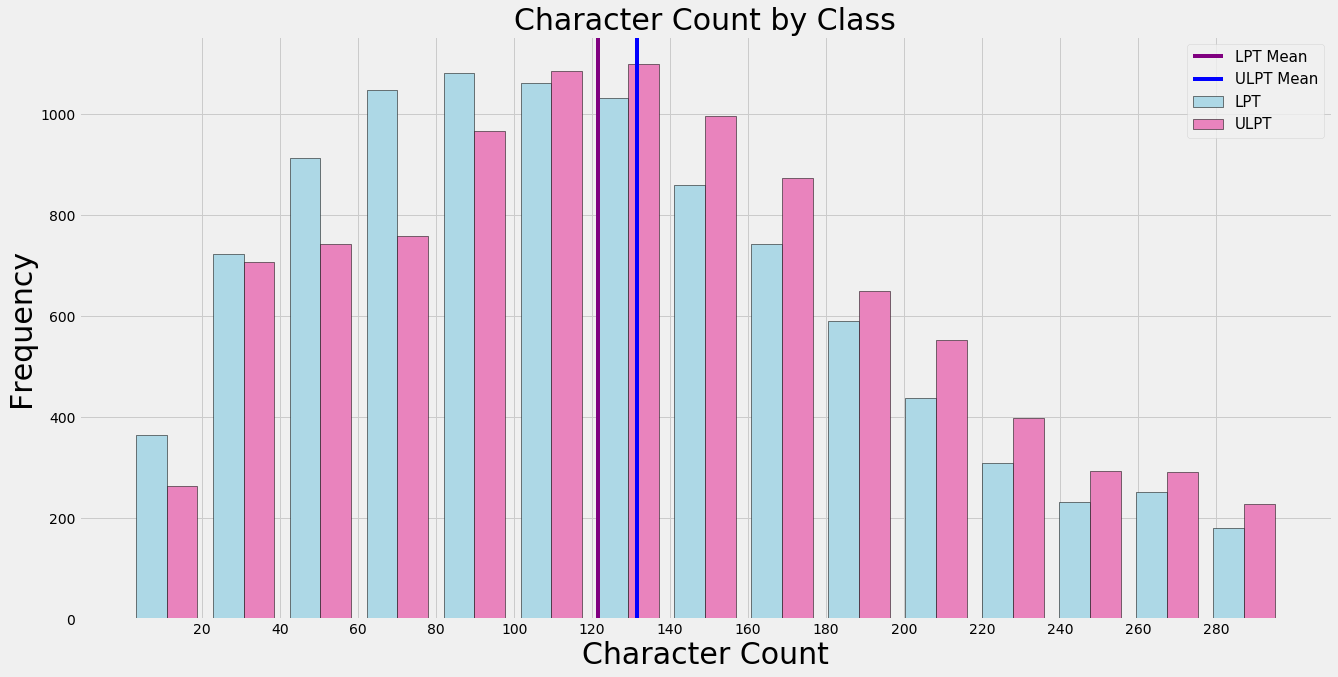

In [176]:
plt.figure(figsize=(20,10))
plt.hist([df[df['subreddit']==0]['title_length'], 
               df[df['subreddit']==1]['title_length']],
               bins=15, 
               color=['lightblue', '#E983BD'], 
               ec='k')
# plt.hist([df[df['subreddit']==0]['title_length'], 
#                df[df['subreddit']==1]['title_length']],
#                bins=15, 
#                color=['#23E9E3', '#EF9E35'], 
#                ec='#23E9E3')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Character Count', fontsize = 30)
plt.axvline(df[df['subreddit']==0]['title_length'].mean(), color = 'purple')
plt.axvline(df[df['subreddit']==1]['title_length'].mean(), color = 'blue')
plt.title('Character Count by Class', fontsize=30)
plt.legend(['LPT Mean', 'ULPT Mean', 'LPT', 'ULPT'], fontsize = 15)
plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280]);

The character count of the ULPT posts is distributed pretty normally, with a slight right skew. LPT is also distributed pretty normally, but is more skewed to the right. The mean character count for both classes is between 120 and 130. Also looking at this graph gives me insight into the fact that there are quite a few posts with less than 40 characters per title. I don't think 40 characters is enough to say a whole lot, so I will look into these. Looking at this distribution, it doesn't seem to lend any insight into whether or not a post's length has any information about whether or not it is toxic, unethical, or insincere.

Plotting the distribution of word count by class along with the mean word count of each. 

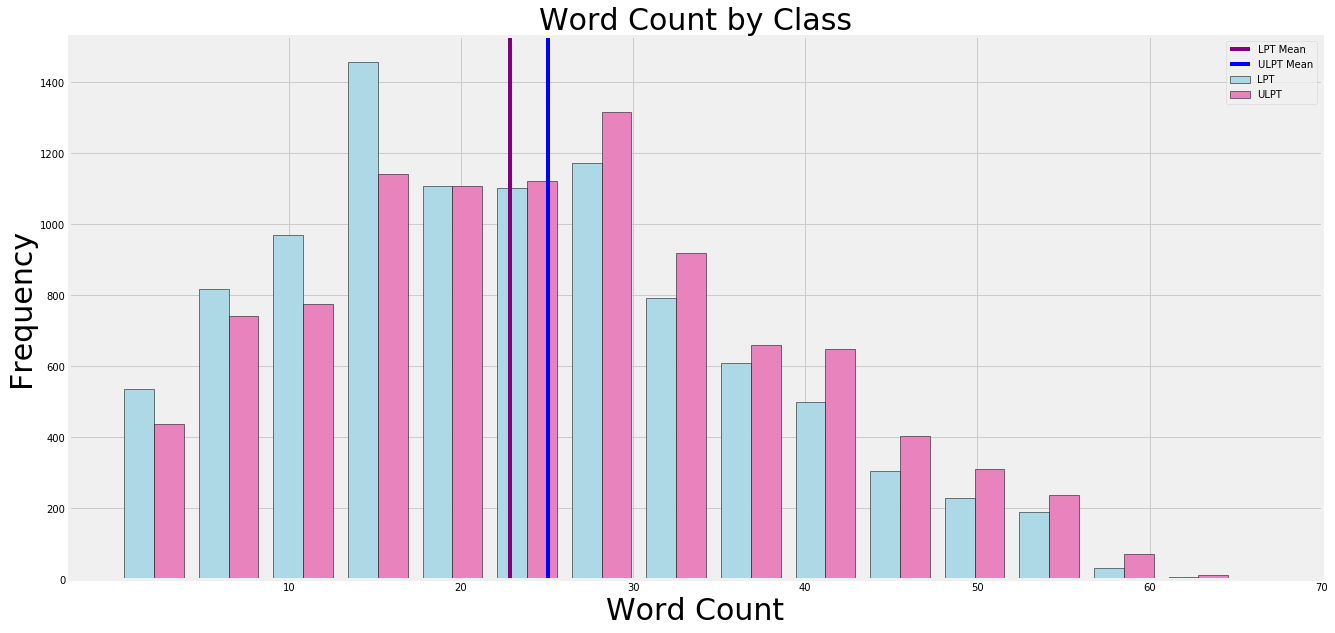

In [31]:
plt.figure(figsize=(20,10))
plt.hist([df[df['subreddit']==0]['word_count'], 
               df[df['subreddit']==1]['word_count']],
               bins=15, 
               color=['lightblue', '#E983BD'], 
               ec='k')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Word Count', fontsize = 30)
plt.axvline(df[df['subreddit']==0]['word_count'].mean(), color = 'purple')
plt.axvline(df[df['subreddit']==1]['word_count'].mean(), color = 'blue')
plt.title('Word Count by Class', fontsize=30)
plt.legend(['LPT Mean', 'ULPT Mean', 'LPT', 'ULPT'])
plt.xticks([10,20,30,40,50,60,70]);

The word counts are a little less normally distributed. LPT spikes around 15 words, and ULP spike around 30 words. Their means are pretty similar, around 23-25 words. Similar to above, this plot doesn't give us any insight as to whether or not a post's word count indicates how toxic or unethical it may be.

Looking at titles with 'request' in them. I will remove request and leave the text, as it may still give us some insight as to whether or not the text is unethical or conveying a toxic message or request. 

In [32]:
len(df[df['title'].str.contains('reques')])

912

In [33]:
df['title'] = df['title'].str.replace('request','')

Checking to see if any posts have 'unethical', 'ulpt', or 'lpt' in them. Will remove that word. 

In [34]:
len(df[df['title'].str.contains('unethical')])

50

In [35]:
df['title'] = df['title'].str.replace('unethical', '')

In [36]:
df['title'] = df['title'].str.replace('ulpt', '')

In [37]:
df['title'] = df['title'].str.replace('lpt', '')

In [38]:
df['title_length'].min()

1

Looking at the titles with less than 40 characters. These are likely to have little context and little signal, and many of them may have been part of a post with selftext, which I removed.

In [39]:
df[df['title_length'] <=40].head()

,author,title,subreddit,permalink,title_length,word_count
12251,henzhou,how to get free amazon prime,1,/r/UnethicalLifeProTips/comments/aufc2y/ulpt_r...,36,7
10788,Franlian,found a gift card worth,1,/r/UnethicalLifeProTips/comments/b241ds/ultp_r...,32,6
9331,iamnotagarlicbread,nevr sell a god hamburg,0,/r/LifeProTips/comments/aq7hw9/nevr_sell_a_god...,23,5
4257,aelbaum,nclogg a drain without a plunger,0,/r/LifeProTips/comments/azti6e/unclogg_a_drain...,32,6
1297,acow552,do you get mouth ulcers use listerine,0,/r/LifeProTips/comments/b5nbju/do_you_get_mout...,37,7


They seem to be mostly typos, short posts with no context, or posts with selftext. 

In [40]:
len(df[df['title_length'] <=40])

2057

I think my dataset is big enough that I can remove the titles with less than 40 characters.

Dropping all rows with a character count of less than 40 to get rid of accidental posts and things without substance.

In [41]:
df.index = range(len(df['title']))

Using a try except in my for loop to make sure that nothing gets missed, and if it does, I will know which line.

In [42]:
for i in range(len(df['title'])):
    count = 0
    try:
        if len(df['title'][i]) <= 40:       
            df.drop(i, inplace=True)
    except:
        KeyError
        count += 1
        print(i)

Resetting the index after deleting rows. 

In [43]:
df['title_length'].min()

41

In [44]:
df.index = range(len(df['title']))

Checking my distribution again after removing a few thousand rows. 

In [45]:
df.subreddit.value_counts(normalize=True)

1    0.503983
0    0.496017
Name: subreddit, dtype: float64

Still pretty equal distribution. 

Pushing this cleaned dataset to csv for modelling. 

In [46]:
df.to_csv('../data/df_clean.csv', index=False)

Going to run my train test split and pickle out the data for use in later notebooks. My train test split will split my dataframe into 75% training set, in which i will fit and train my model, and a 25% test set, which I will use for validation. 

In [96]:
X = df.title
y = df.subreddit

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 13,
                                                    stratify = y)

Pickling out my train test split for use in later notebooks. 

In [100]:
with open('../assets/X_train.pkl', 'wb+') as f:
    pickle.dump(X_train, f)
with open('../assets/X_test.pkl', 'wb+') as f:
    pickle.dump(X_test, f)
with open('../assets/y_train.pkl', 'wb+') as f:
    pickle.dump(y_train, f)
with open('../assets/y_test.pkl', 'wb+') as f:
    pickle.dump(y_test, f)

### Using my Countvectorizer to look at the top words in each class.

Instantiating my cvec for class 0 with an ngram range of 1,1 and 'english' stop words

In [126]:
cvec_lpt = CountVectorizer(ngram_range = (1,1), stop_words = 'english')

Setting up a series for my 0 class. 

In [127]:
X_lpt = df['title'][df['subreddit'] == 0]

Fitting my series with my vectorizor. 

In [128]:
cvec_lpt.fit(X_lpt)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Transforming my series. 

In [129]:
X_lpt_cvec = cvec_lpt.transform(X_lpt)

Taking a look at the first 10 words alphabetically.

In [130]:
cvec_lpt.get_feature_names()[:10]

['ab',
 'abandon',
 'abandoned',
 'abbreviate',
 'abbreviation',
 'abbreviations',
 'abcgmailcom',
 'ability',
 'able',
 'ablebodiedness']

Some of these words are giberish, but I will leave them in, as I can't tell the context in which they are posted currently.

Creating a dataframe of my most common lpt words with their counts.

In [131]:
most_common_lpt = pd.DataFrame(X_lpt_cvec.toarray(), columns = cvec_lpt.get_feature_names()).sum().sort_values(ascending = False)

In [132]:
most_common_lpt.head(15)

dont       1307
youre      1058
use         875
make        811
just        757
time        730
want        694
like        631
phone       527
way         511
need        471
people      463
instead     415
water       398
know        386
dtype: int64

Looking at these words, my guess is that both classes will have many of these words in their most frequently used. dont, your, use, make, just, want, like are all pretty common words. Lets continue.

Doing the same process with my target class. 

In [133]:
X_ulpt = df['title'][df['subreddit'] == 1]

In [134]:
cvec_ulpt = CountVectorizer(ngram_range = (1,1), stop_words = 'english')

In [135]:
cvec_ulpt.fit(X_ulpt)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [136]:
X_ulpt_cvec = cvec_ulpt.transform(X_ulpt)

In [137]:
cvec_ulpt.get_feature_names()[:10]

['aa',
 'aah',
 'aampe',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abcatgmailcom',
 'abcde',
 'abd']

In [138]:
most_common_ulpt = pd.DataFrame(X_ulpt_cvec.toarray(), columns = cvec_ulpt.get_feature_names()).sum().sort_values(ascending = False)

In [139]:
most_common_ulpt.head(15)

want      1915
free      1205
just      1158
dont      1153
youre     1058
make       805
need       745
like       708
people     681
buy        663
use        632
tell       620
time       618
money      552
say        549
dtype: int64

In [140]:
df_ulpt = most_common_ulpt.to_frame()

In [141]:
df_ulpt['count'] = df_ulpt

In [142]:
df_ulpt.head()

,0,count
want,1915,1915
free,1205,1205
just,1158,1158
dont,1153,1153
youre,1058,1058


In [143]:
df_lpt = most_common_lpt.to_frame()
df_lpt['count'] = df_lpt

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text yticklabel objects>)

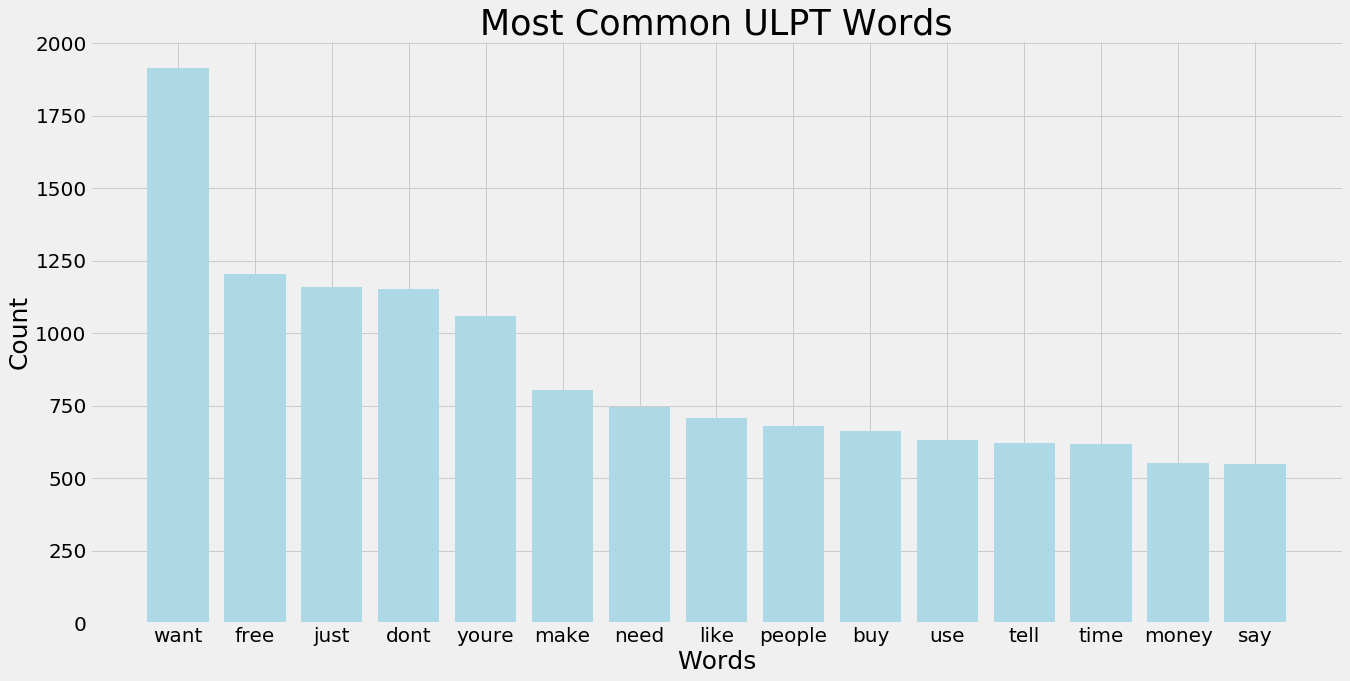

In [144]:
plt.figure(figsize = (20,10))
plt.bar(most_common_ulpt.head(15).index, height = df_ulpt['count'].head(15), color = 'lightblue')
plt.title('Most Common ULPT Words', fontsize = 35)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Words', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

All of the words I mentioned above, (dont, your, use, make, just, want, like) are also in the top 10 most frequently used words in the target class as well. I will explore a way to add these to the stop words further down. 

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text yticklabel objects>)

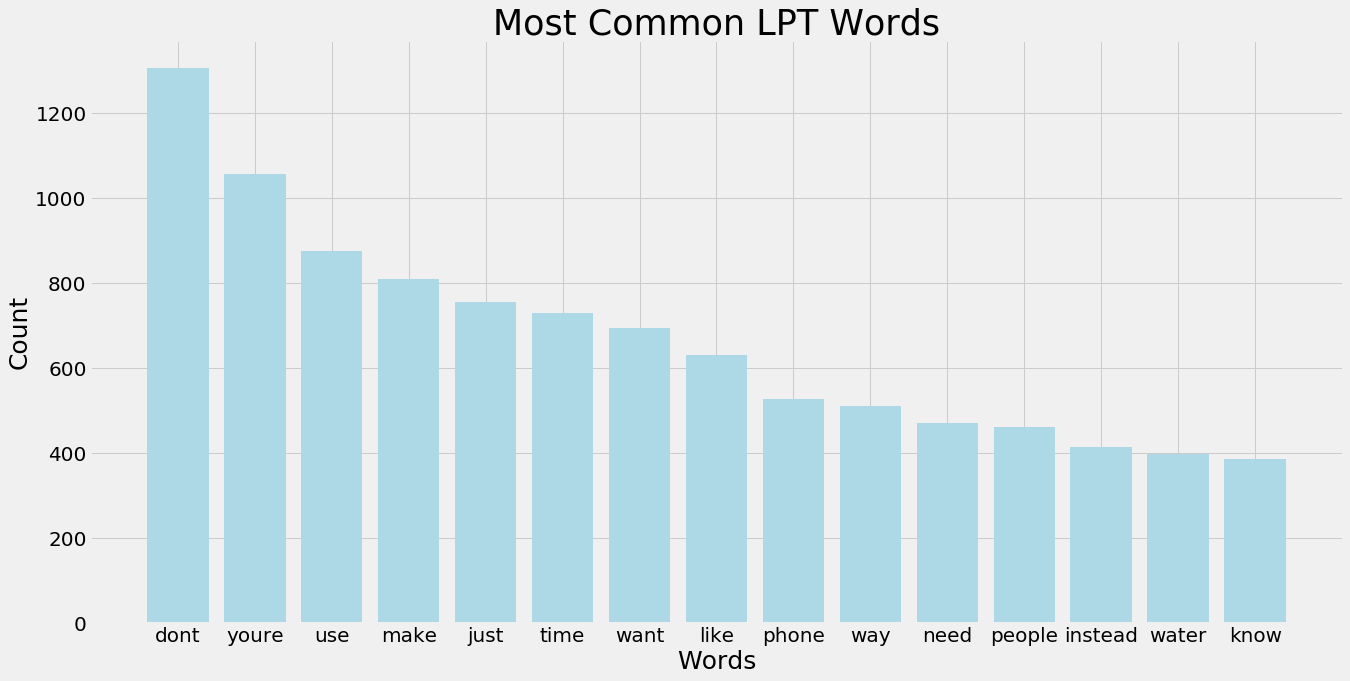

In [145]:
plt.figure(figsize = (20,10))
plt.bar(most_common_lpt.head(15).index, height = df_lpt['count'].head(15), color = 'lightblue')
plt.title('Most Common LPT Words', fontsize = 35)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Words', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

As mentioned above, a lot of the top 15 most used words overlap between the two classes. I will be adding the intersection of the top 50 words of each class to my stopwords list. Some of these are such common words in the english language that it makes sense that there is some intersection between the two classes.

Creating a most common list of the top 50 words of each class and will use the intersection of those as an additional list of stopwords.

In [78]:
most_common_list_lpt = list(most_common_lpt.head(50).index)

In [79]:
most_common_list_ulpt = list(most_common_ulpt.head(50).index)

In [86]:
intersect_ulpt_lpt = list(set(most_common_list_lpt).intersection(set(most_common_list_ulpt)))

In [93]:
len(intersect_ulpt_lpt)

33

The above is the additional list of stopwords I will be adding. They aren't very polar words, so I am hoping they take out insignificant noise from my lists. 

Looking at the unique words left in each class

In [88]:
lpt_unique = list(set(cvec_lpt.get_feature_names()) - (set(cvec_ulpt.get_feature_names())))

In [83]:
len(lpt_unique)

6097

In [84]:
ulpt_unique = list(set(cvec_ulpt.get_feature_names()) - (set(cvec_lpt.get_feature_names())))

In [85]:
len(ulpt_unique)

5499

The target class uses less unique words. Perhaps they focus more around similar topics when posting. Or perhaps toxic language is more limited than sincere language.

Importing the stop words and adding my own stop words to them. Will pickle them out after.

In [89]:
from sklearn.feature_extraction import text 
stopwords = text.ENGLISH_STOP_WORDS.union(intersect_ulpt_lpt)

In [92]:
with open('../assets/stopwords.pkl', 'wb+') as f:
    pickle.dump(stopwords, f)

### Conclusion and Next Steps

Looking into the distributions of the word counts and character counts of each class, I couldn't make any realistic inferences regarding the tendencies of each class. Perhaps toxic language is more succinct and to the point, perhaps not. With the current dataset, I didn't see a trend. For the most part, both classes were pretty normally distributed with a slight skew to the right in both their word counts and their character counts. Even looking at the top 15 words in each class, it was difficult to see trends, as they both had several common words. While some of the words, like 'want' were in both classes, 'want' was used close to 2000 times in my target class, ULPT, vs 700 times in my 0 class. While this may not be the best choice, I added that, along with 32 other intersecting words to my stopwords list, which will be implemented in my next notebook.

Next steps include exploring different modeling techniques and interpretting those models. I will look into the usage of specific words and how my models interpret those words to predict whether or not a given post is insincere or toxic. 